## Multiple Linear Regression
### Lazy for descriptions ;)

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
page = requests.get(url)
open('FuelConsumption.csv','wb').write(page.content)

72629

In [3]:
df = pd.read_csv('FuelConsumption.csv')
df.head(8)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [5]:
df.isnull().any().any()

False

In [6]:
columns = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']
cdf = df[columns]
cdf.head(8)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255


Correlation: 0.8742


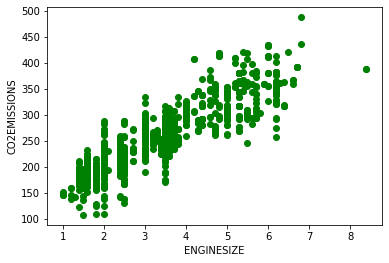

Correlation: 0.8497


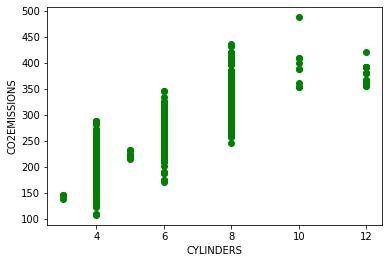

Correlation: 0.8980


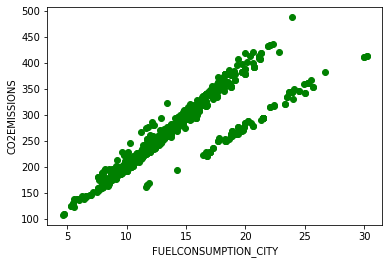

Correlation: 0.8617


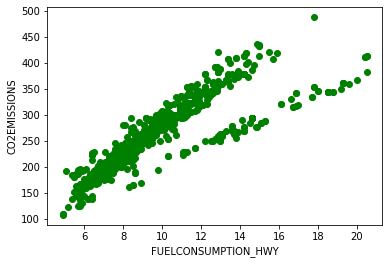

Correlation: 0.8921


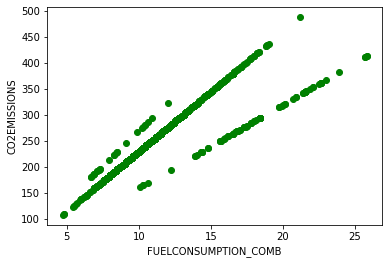

In [7]:
target = 'CO2EMISSIONS'
for i in range(0,len(columns)-1):
    current = cdf[columns[i]]
    print("Correlation: %.4f" %current.corr(cdf[target]))
    plt.scatter(current,cdf[target],color='g')
    plt.xlabel(columns[i])
    plt.ylabel(target)
    plt.show()

In [8]:
mask = np.random.rand(len(cdf))>0.8
train = cdf[mask]
test = cdf[~mask]

In [9]:
xtrain = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
ytrain = np.asanyarray(train[['CO2EMISSIONS']])

In [10]:
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)
print("Intercept: ",regressor.intercept_)
print("Coefficient: " ,regressor.coef_)

Intercept:  [58.79090121]
Coefficient:  [[ 12.92935726   9.26047313 -54.10179068 -32.67259451  97.59483935]]


In [11]:
xtest = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
ytest = np.asanyarray(test[['CO2EMISSIONS']])

In [12]:
ypred  = regressor.predict(xtest)


In [13]:
print("MSE: %.4f" %np.mean( (ytest-ypred)**2 ))
print("RSQURE: %.4f" %r2_score(y_true=ytest,y_pred=ypred))

MSE: 576.0966
RSQURE: 0.8513
